In [1]:
import pandas as p
import numpy
import matplotlib.pyplot as plt

In [2]:
#load the two datasets
world_data_2023_df = p.read_csv("world-data-2023.csv")
emigration_immigration_rates_df = p.read_excel("emigration-immigration-rates.xlsx")

#save copies of the datasets
justImportedWorldData = world_data_2023_df.copy(deep=True)
justImportedEmigrationData = emigration_immigration_rates_df.copy(deep=True)

In [3]:
print(world_data_2023_df.keys())

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')


In [4]:
print(emigration_immigration_rates_df.keys())

Index(['country', 'isoo', 'year', 'region10_ori', 'iso3', 'Emigrants_males_HS',
       'Emigrants_males_LS', 'Emigrants_males', 'Emigrants_014_male',
       'Emigrants_females_HS', 'Emigrants_females_LS', 'Emigrants_females',
       'Emigrants_014_female', 'Immigrants_males_HS', 'Immigrants_males_LS',
       'Immigrants_males', 'Immigrants_014_male', 'Immigrants_females_HS',
       'Immigrants_females_LS', 'Immigrants_females', 'Immigrants_014_female',
       'popm014', 'popf014', 'gdppc_cst', 'gdppc_cstppp',
       'Share_tertiary_educated', 'Share_tertiary_educated_females',
       'Share_tertiary_educated_males', 'Labor_females', 'Labor_males',
       'Labor', 'Labor_HS', 'Labor_LS', 'Labor_females_HS', 'Labor_females_LS',
       'Labor_males_HS', 'Labor_males_LS', 'Share_educated_Nat',
       'Share_educated_Nat_females', 'Share_educated_Nat_males',
       'emig_rate_HS', 'emig_rate_LS', 'emig_rate', 'emig_rate_HS_female',
       'emig_rate_LS_female', 'emig_rate_female', 'emig_rat

In [5]:
#using the information from https://www.iban.com/country-codes, we create a mapping from the two letter codes to three letter codes
twoToThreeLetterCountryCodeMapping = {
    "AF": "AFG", "AL": "ALB", "DZ": "DZA", "AS": "ASM", "AD": "AND", "AO": "AGO", "AI": "AIA",
    "AQ": "ATA", "AG": "ATG", "AR": "ARG", "AM": "ARM", "AW": "ABW", "AU": "AUS", "AT": "AUT",
    "AZ": "AZE", "BS": "BHS", "BH": "BHR", "BD": "BGD", "BB": "BRB", "BY": "BLR", "BE": "BEL",
    "BZ": "BLZ", "BJ": "BEN", "BM": "BMU", "BT": "BTN", "BO": "BOL", "BQ": "BES", "BA": "BIH",
    "BW": "BWA", "BV": "BVT", "BR": "BRA", "IO": "IOT", "BN": "BRN", "BG": "BGR", "BF": "BFA",
    "BI": "BDI", "CV": "CPV", "KH": "KHM", "CM": "CMR", "CA": "CAN", "KY": "CYM", "CF": "CAF",
    "TD": "TCD", "CL": "CHL", "CN": "CHN", "CX": "CXR", "CC": "CCK", "CO": "COL", "KM": "COM",
    "CD": "COD", "CG": "COG", "CK": "COK", "CR": "CRI", "HR": "HRV", "CU": "CUB", "CW": "CUW",
    "CY": "CYP", "CZ": "CZE", "CI": "CIV", "DK": "DNK", "DJ": "DJI", "DM": "DMA", "DO": "DOM",
    "EC": "ECU", "EG": "EGY", "SV": "SLV", "GQ": "GNQ", "ER": "ERI", "EE": "EST", "SZ": "SWZ",
    "ET": "ETH", "FK": "FLK", "FO": "FRO", "FJ": "FJI", "FI": "FIN", "FR": "FRA", "GF": "GUF",
    "PF": "PYF", "TF": "ATF", "GA": "GAB", "GM": "GMB", "GE": "GEO", "DE": "DEU", "GH": "GHA",
    "GI": "GIB", "GR": "GRC", "GL": "GRL", "GD": "GRD", "GP": "GLP", "GU": "GUM", "GT": "GTM",
    "GG": "GGY", "GN": "GIN", "GW": "GNB", "GY": "GUY", "HT": "HTI", "HM": "HMD", "VA": "VAT",
    "HN": "HND", "HK": "HKG", "HU": "HUN", "IS": "ISL", "IN": "IND", "ID": "IDN", "IR": "IRN",
    "IQ": "IRQ", "IE": "IRL", "IM": "IMN", "IL": "ISR", "IT": "ITA", "JM": "JAM", "JP": "JPN",
    "JE": "JEY", "JO": "JOR", "KZ": "KAZ", "KE": "KEN", "KI": "KIR", "KP": "PRK", "KR": "KOR",
    "KW": "KWT", "KG": "KGZ", "LA": "LAO", "LV": "LVA", "LB": "LBN", "LS": "LSO", "LR": "LBR",
    "LY": "LBY", "LI": "LIE", "LT": "LTU", "LU": "LUX", "MO": "MAC", "MG": "MDG", "MW": "MWI",
    "MY": "MYS", "MV": "MDV", "ML": "MLI", "MT": "MLT", "MH": "MHL", "MQ": "MTQ", "MR": "MRT",
    "MU": "MUS", "YT": "MYT", "MX": "MEX", "FM": "FSM", "MD": "MDA", "MC": "MCO", "MN": "MNG",
    "ME": "MNE", "MS": "MSR", "MA": "MAR", "MZ": "MOZ", "MM": "MMR", "NA": "NAM", "NR": "NRU",
    "NP": "NPL", "NL": "NLD", "NC": "NCL", "NZ": "NZL", "NI": "NIC", "NE": "NER", "NG": "NGA",
    "NU": "NIU", "NF": "NFK", "MP": "MNP", "NO": "NOR", "OM": "OMN", "PK": "PAK", "PW": "PLW",
    "PS": "PSE", "PA": "PAN", "PG": "PNG", "PY": "PRY", "PE": "PER", "PH": "PHL", "PN": "PCN",
    "PL": "POL", "PT": "PRT", "PR": "PRI", "QA": "QAT", "MK": "MKD", "RO": "ROU", "RU": "RUS",
    "RW": "RWA", "RE": "REU", "BL": "BLM", "SH": "SHN", "KN": "KNA", "LC": "LCA", "MF": "MAF",
    "PM": "SPM", "VC": "VCT", "WS": "WSM", "SM": "SMR", "ST": "STP", "SA": "SAU", "SN": "SEN",
    "RS": "SRB", "SC": "SYC", "SL": "SLE", "SG": "SGP", "SX": "SXM", "SK": "SVK", "SI": "SVN",
    "SB": "SLB", "SO": "SOM", "ZA": "ZAF", "GS": "SGS", "SS": "SSD", "ES": "ESP", "LK": "LKA",
    "SD": "SDN", "SR": "SUR", "SJ": "SJM", "SE": "SWE", "CH": "CHE", "SY": "SYR", "TW": "TWN",
    "TJ": "TJK", "TZ": "TZA", "TH": "THA", "TL": "TLS", "TG": "TGO", "TK": "TKL", "TO": "TON",
    "TT": "TTO", "TN": "TUN", "TR": "TUR", "TM": "TKM", "TC": "TCA", "TV": "TUV", "UG": "UGA",
    "UA": "UKR", "AE": "ARE", "GB": "GBR", "UM": "UMI", "US": "USA", "UY": "URY", "UZ": "UZB",
    "VU": "VUT", "VE": "VEN", "VN": "VNM", "VG": "VGB", "VI": "VIR", "WF": "WLF", "EH": "ESH",
    "YE": "YEM", "ZM": "ZMB", "ZW": "ZWE", "AX": "ALA"}

#create a new column using the corresponding 3 letter abbreviations from the two letter abbreviations provided
world_data_2023_df["iso3"] = world_data_2023_df["Abbreviation"].map(twoToThreeLetterCountryCodeMapping)

#clean columns, convert numeric strings to integers
world_data_2023_df["GDP"] = world_data_2023_df["GDP"].str.replace("$","").str.replace(",","").astype(float)
world_data_2023_df["Minimum wage"] = world_data_2023_df["Minimum wage"].str.replace("$","").str.replace(",","").astype(float)
world_data_2023_df["Unemployment rate"] = world_data_2023_df["Unemployment rate"].str.replace("%","").astype(float)
world_data_2023_df["OOP health expenditure"] = world_data_2023_df["Out of pocket health expenditure"].str.replace("%","").astype(float)
world_data_2023_df["Primary education enrollment"] = world_data_2023_df["Gross primary education enrollment (%)"].str.replace("%","").astype(float)
world_data_2023_df["Tertiary education enrollment"] = world_data_2023_df["Gross tertiary education enrollment (%)"].str.replace("%","").astype(float)

In [6]:
emigrants_immagrants_totals_2020_df = emigration_immigration_rates_df[emigration_immigration_rates_df["year"] == 2020][["iso3","Emigrants_total","Immigrants_total","emig_rate","immig_rate"]]
emigrants_immagrants_totals_2020_df["iso3"] = emigrants_immagrants_totals_2020_df["iso3"].replace("ZAR","COD")

In [7]:
#Birth rate
#Infant mortality rate
#Number of physicians available
#Life expectancy
#Out of pocket healthcare costs
#GDP
#unemployment rate
#Minimum Wage
#Primary school enrollment
#Tertiary education enrollment
#Emigrant and immigrant total numbers

columnsFromWorldData = world_data_2023_df[["iso3",
                                           "Birth Rate",
                                           "Infant mortality",
                                           "Physicians per thousand",
                                           "Life expectancy",
                                           "OOP health expenditure",
                                           "GDP",
                                           "Unemployment rate",
                                           "Minimum wage",
                                           "Primary education enrollment",
                                           "Tertiary education enrollment"]]

columnsFromEmigrationImmigrationData = emigrants_immagrants_totals_2020_df

In [8]:
combinedColumns = p.merge(columnsFromWorldData,columnsFromEmigrationImmigrationData, on="iso3")
columnTitles = ["Birth Rate",
                "Infant mortality",
                "Physicians per thousand",
                "Life expectancy",
                "OOP health expenditure",
                "GDP",
                "Unemployment rate",
                "Minimum wage",
                "Primary education enrollment",
                "Tertiary education enrollment",
                "Emigrants_total",
                "Immigrants_total",
                "emig_rate",
                "immig_rate"]
 
variablesOfInterest = combinedColumns[columnTitles]

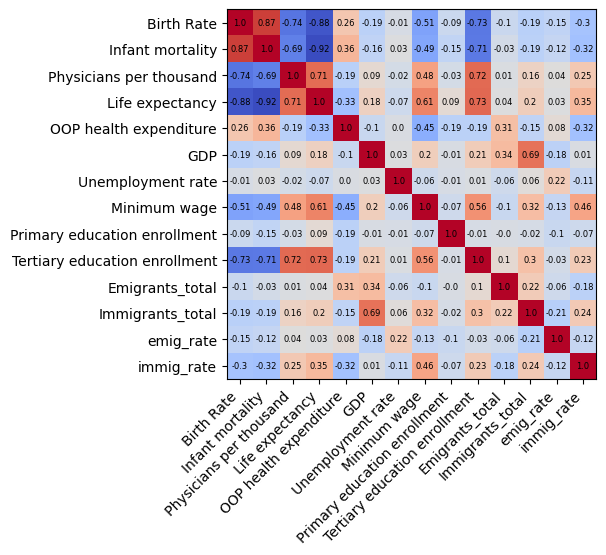

In [9]:
#generate correlation matrix of variables
correlations = variablesOfInterest.corr()

plt.imshow(correlations,cmap="coolwarm")

plt.yticks(numpy.arange(len(columnTitles)),labels=columnTitles)
plt.xticks(numpy.arange(len(columnTitles)),labels=columnTitles,rotation=45,horizontalalignment="right")

y = 0
for i,row in correlations.iterrows():
    x = 0
    for column in row.keys():
        #align the text to the center and round the value to 2 decimal places
        plt.text(x, y, round(row[column],2), ha="center", va="center", color="black", fontsize="6")
        x += 1
    y += 1

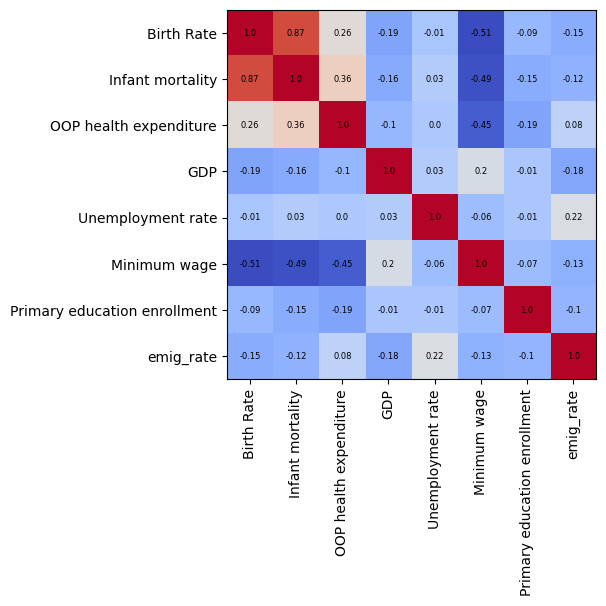

In [10]:
#smaller correlation matrix
refinedColumnTitles = ["Birth Rate",
                       "Infant mortality",
                       #"Life expectancy",
                       #"Physicians per thousand",
                       "OOP health expenditure",
                       "GDP",
                       "Unemployment rate",
                       "Minimum wage",
                       "Primary education enrollment",
                       #"Tertiary education enrollment",
                       #"Emigrants_total",
                       "emig_rate",
                       #"Immigrants_total",
                       #"immig_rate"
                      ]
 
variablesOfHigherInterest = combinedColumns[refinedColumnTitles]

refinedCorrelations = variablesOfHigherInterest.corr()

plt.imshow(refinedCorrelations,cmap="coolwarm")

plt.yticks(numpy.arange(len(refinedColumnTitles)),labels=refinedColumnTitles)
plt.xticks(numpy.arange(len(refinedColumnTitles)),labels=refinedColumnTitles,rotation=90)

y = 0
for i,row in refinedCorrelations.iterrows():
    x = 0
    for column in row.keys():
        #align the text to the center and round the value to 2 decimal places
        plt.text(x, y, round(row[column],2), ha="center", va="center", color="black", fontsize="6")
        x += 1
    y += 1

In [11]:
#basic statistics for some of the variables of interest
variableStats = {}
variableStats["Name"] = []
variableStats["Minimum"] = []
variableStats["Maximum"] = []
variableStats["Median"] = []
variableStats["Mean"] = []
variableStats["St. Deviation"] = []

for colTitle in refinedColumnTitles:
    variableStats["Name"].append(colTitle)
    variableStats["Minimum"].append(f"{combinedColumns[colTitle].min():.4g}")
    variableStats["Maximum"].append(f"{combinedColumns[colTitle].max():.5g}")
    variableStats["Median"].append(f"{combinedColumns[colTitle].median():.5g}")
    variableStats["Mean"].append(f"{combinedColumns[colTitle].mean():.5g}")
    variableStats["St. Deviation"].append(f"{combinedColumns[colTitle].std():.4g}")

p.DataFrame(variableStats)

,Name,Minimum,Maximum,Median,Mean,St. Deviation
0,Birth Rate,5.9,46.08,18.125,20.397,9.944
1,Infant mortality,1.4,84.5,14.3,21.53,19.52
2,OOP health expenditure,0.2,81.6,30.5,32.519,19.23
3,GDP,4.727e+07,2.1428e+13,3.3109e+10,4.7544e+11,2.167e+12
4,Unemployment rate,0.09,28.18,5.36,6.9175,5.138
5,Minimum wage,0.01,13.59,1.03,2.2645,3.071
6,Primary education enrollment,23.4,142.5,102.6,102.65,13.19
7,emig_rate,0.0004992,0.46864,0.070321,0.10669,0.1009


In [12]:
#display top countries by number of emigrants
print(emigration_immigration_rates_df[emigration_immigration_rates_df["year"]==2020][["country","emig_rate","Emigrants_total","year"]].sort_values(by="emig_rate",ascending=False).head())

       country  emig_rate  Emigrants_total  year
146  Palestine   0.517266          3172474  2020
175      Tonga   0.468641            60816  2020
190      Samoa   0.455977           104437  2020
69     Grenada   0.453566            71189  2020
71      Guyana   0.431119           430779  2020


In [13]:
#display top countries by emigration rate
print(emigration_immigration_rates_df[emigration_immigration_rates_df["year"]==2020][["country","emig_rate","Emigrants_total","year"]].sort_values(by="Emigrants_total",ascending=False).head())

                country  emig_rate  Emigrants_total  year
78                India   0.016065         16637478  2020
113              Mexico   0.106109         11350864  2020
32                China   0.007992          9355148  2020
149  Russian Federation   0.070833          8966370  2020
15           Bangladesh   0.055220          7050369  2020


In [14]:
print(world_data_2023_df.keys())

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude', 'iso3', 'OOP health expenditure',
       'Primary education enrollment', 'Tertiary education enrollment'],
      dtype='object')


In [15]:
#Testing to determine which countries did not overlap between the two datasets
eiCountries = set(emigration_immigration_rates_df[emigration_immigration_rates_df["year"]==2020]["country"].unique())
wdCountries = set(world_data_2023_df["Country"].unique())

mySet = ((eiCountries | wdCountries) - (eiCountries & wdCountries))

l = ['Bahamas, The','The Bahamas',
    'Democratic Republic of the Congo','Congo, Dem. Rep.',
    'Republic of the Congo', 'Congo, Rep.', 
    'Republic of Ireland', 'Ireland',
    "Cote d'Ivoire", 'Ivory Coast',
    'Turkiye', 'Turkey',
    'Venezuela', 'Venezuela, RB',
    'The Gambia', 'Gambia, The',
    'Saint Vincent and the Grenadines','St. Vincent and the Grenadines',
     'Egypt', 'Egypt, Arab Rep.',
     'Korea, Rep.', 'South Korea',
     'Yemen', 'Yemen, Rep.',
     'Kyrgyzstan', 'Kyrgyz Republic',
     'Saint Lucia', 'St. Lucia',
     'Slovakia', 'Slovak Republic',
     'Iran, Islamic Rep.', 'Iran',
     'Serbia', 'Montenegro', 'Serbia and Montenegro', #Serbia and montenegro represented separately in one dataset vs. the other
     'Russian Federation', 'Russia',
     'East Timor', 'Timor-Leste',
     'North Korea', "Korea, Dem. People's Rep.",
     'St. Kitts and Nevis', 'Saint Kitts and Nevis',
     'Micronesia, Fed. Sts.', 'Federated States of Micronesia',
     'Brunei Darussalam', 'Brunei',
     'Syrian Arab Republic', 'Syria',
     'Cabo Verde', 'Cape Verde',
     'Palestinian National Authority', 'Palestine',
     'Lao PDR', 'Laos',
     'S�����������', 'Sao Tome and Principe',
     
    ]

for s in l:
    mySet.discard(s)

print(mySet)

{'Hong Kong SAR, China', 'Western Sahara', 'Macao SAR, China', 'Vatican City', 'Niue'}
